# Visual Exploratory Data Analysis

In this notebook, several visualizations are generated to gain a general understanding of the dataset, the distribution of housing sale prices, and the differences in sale prices within different categories of houses.

In [1]:
# import packages used for plotting

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read in data file

df = pd.read_csv('Data/train.csv')

In [3]:
# examine the DataFrame columns and records

pd.set_option('display.max_columns', None)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The DataFrame contains 81 columns, including an ID column and the target variable, the Sale Price. The remaining 79 columns are all features of each home, and include both numerical and categorical features. There are a total of 1460 homes recorded in this dataset 

### Distribution of Home Sale Prices

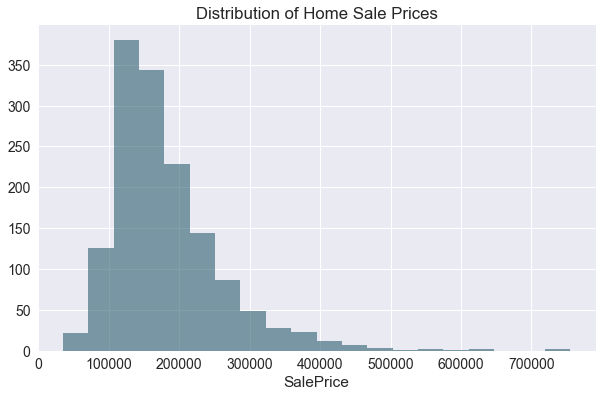

In [6]:
# plot distribution of sale prices

sns.set(rc={"figure.figsize": (10, 6)}, font_scale=1.4)
sns.set_palette(palette='GnBu_d')

sns.distplot(df.SalePrice, kde=False, bins=20)
plt.title("Distribution of Home Sale Prices")
plt.show()

It seems the majority of homes fall between the `$`100,000 - `$`200,000  range, but the distribution is skewed to the right, with some homes significantly more expensive than the average home

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average home price is about `$`180,000, with a standard deviation of `$`79,442. The cheapest home is about `$`35,000, and the most expensive home is `$`755,000.

In [7]:
pd.DataFrame(df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Sale Price By Year Built

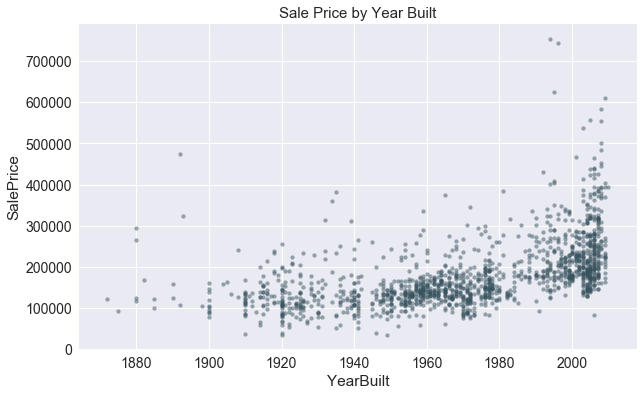

In [7]:
sns.regplot(x=df.YearBuilt, y=df.SalePrice, fit_reg=False, scatter_kws={'alpha':0.5, 's':18})
plt.title('Sale Price by Year Built', fontsize=15)
plt.show()


Examining the relationship between the sale price and the year the home was constructed, it appears that newer homes - constructed after the 1990s - had noticeably higher prices, but homes older than that tended to not have a notable difference in sale price.

### Sale Price by Above Grade Living Area

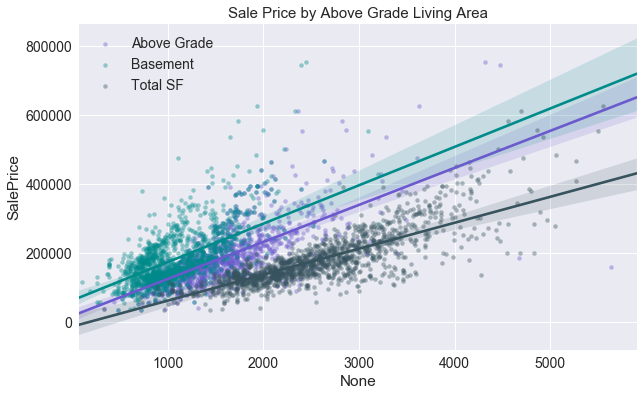

In [72]:
sns.regplot(x=df.GrLivArea, y=df.SalePrice, scatter_kws={'alpha':0.4, 's':20}, label='Above Grade', color='slateblue')
sns.regplot(x=df.TotalBsmtSF, y=df.SalePrice, scatter_kws={'alpha':0.4, 's':20}, label='Basement', color='darkcyan')
sns.regplot(x=(df.TotalBsmtSF+df.GrLivArea), y=df.SalePrice, scatter_kws={'alpha':0.4, 's':20}, label='Total SF')
plt.title('Sale Price by Above Grade Living Area', fontsize=15)
plt.legend()
plt.show()


As expected, there is a correlation between the living area square footage and the sale price. Because the data is split into above grade living area and basement area, a third feature is also created, called “Total SF,” to examine the relationship between total square footage and sale price.

### Sale Price by Overall Quality

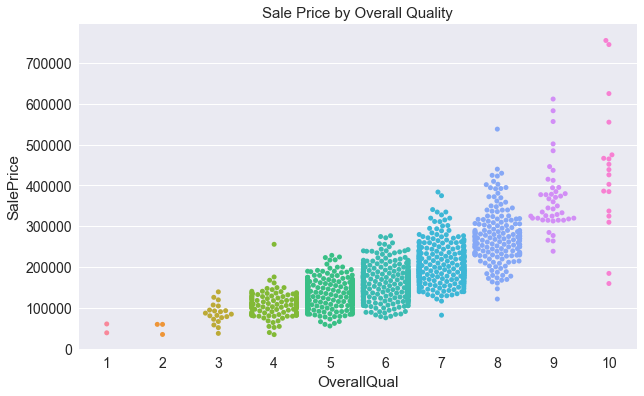

In [9]:
sns.swarmplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Sale Price by Overall Quality', fontsize=15)
plt.show()


There is a very noticeable relationship between quality and sale price, with the homes rated highly in quality having higher prices.

### Sale Price by Overall Condition

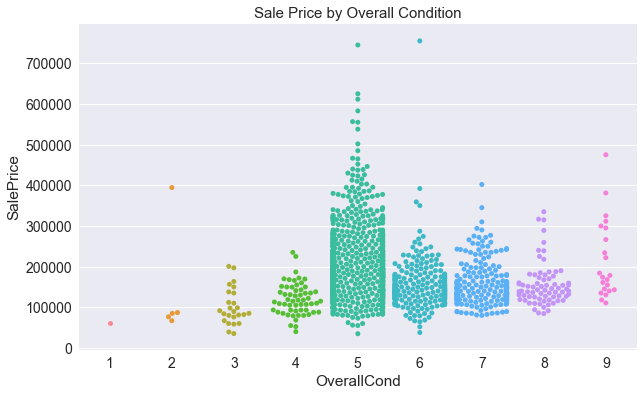

In [10]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Sale Price by Overall Condition', fontsize=15)
plt.show()


By condition, homes that were rated highly tended to have very slightly higher sale prices, but not by too much. The majority of homes received a rating of 5 for condition.

### Sale Price by Above Grade Area, Colored by Lot Configuration

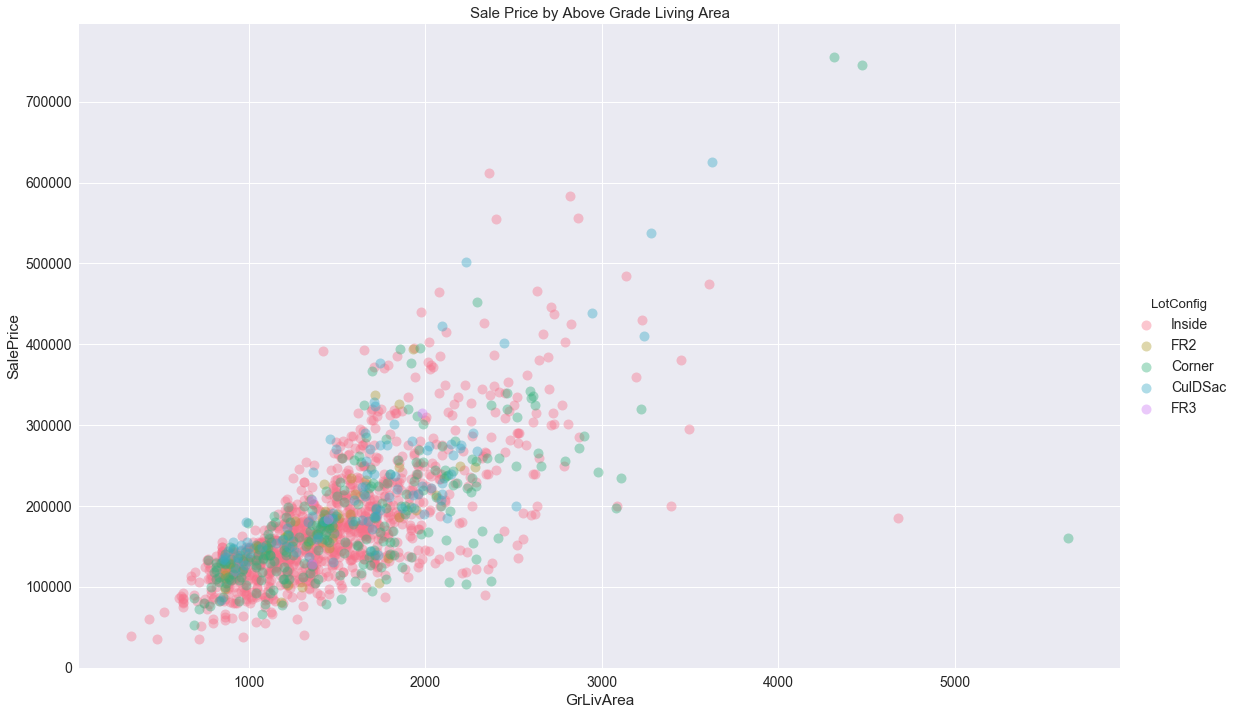

In [11]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=df, fit_reg=False, hue='LotConfig', palette='husl', scatter_kws={'alpha':0.4, 's':100}, size=10, aspect=1.6)

plt.title('Sale Price by Above Grade Living Area', fontsize=15)
plt.show()

If the data points are colored based on their lot configuration, there doesn't appear to be a strong relationship or trend between the sale price and lot configuration. However, it can be observed that the majority of homes have either inside lots or corner lots.

### Sale Price by Neighborhood

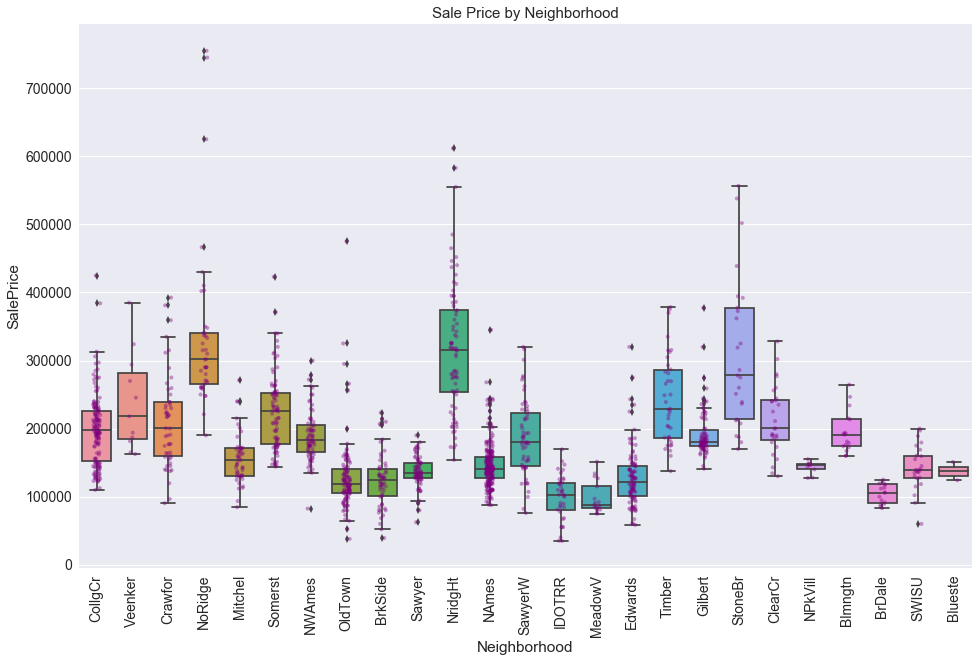

In [12]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
sns.stripplot(x='Neighborhood', y='SalePrice', data=df, color='purple', jitter=1, size=4, alpha=0.4)
plt.title('Sale Price by Neighborhood', fontsize=15)
plt.xticks(rotation=90)
plt.show()

The boxplot above depicts the spread of sale prices by neighborhood. Northridge Heights appears to have homes with the highest sale prices. 

### Distribution of Sale Prices by Slope Type

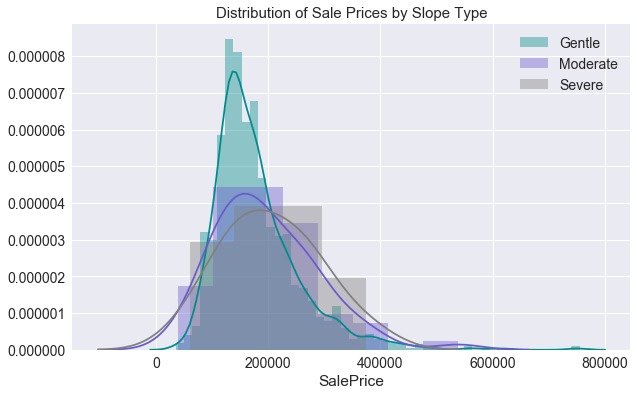

In [40]:
sns.distplot(df[df.LandSlope=='Gtl'].SalePrice, label='Gentle', color='darkcyan')
sns.distplot(df[df.LandSlope=='Mod'].SalePrice, label='Moderate', color='slateblue')
sns.distplot(df[df.LandSlope=='Sev'].SalePrice, label='Severe', color='grey')
plt.title('Distribution of Sale Prices by Slope Type', fontsize=15)
plt.legend()

plt.show()


Examining the sale prices by the slope of the land shows that most homes were located on a plot with a gentle slope. The range of prices tended to be similar no matter the slope of the plot.

### Sale Price by Garage Type

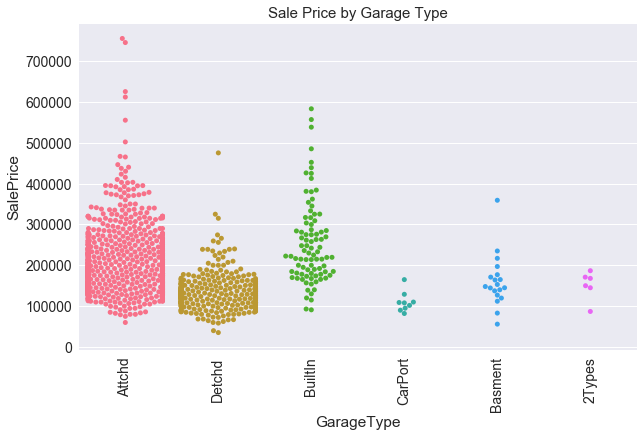

In [15]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='GarageType', y='SalePrice', data=df, palette='husl')
plt.title('Sale Price by Garage Type', fontsize=15)
plt.xticks(rotation=90)
plt.show()


Most of the homes in the dataset had attached garages. Homes with attached garages tended to have higher home values than homes that had detached garages.

### Sale Price by Zoning Type

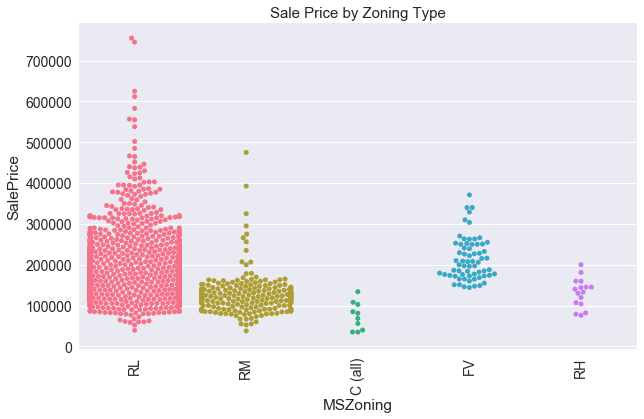

In [14]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='MSZoning', y='SalePrice', data=df, palette='husl')
plt.title('Sale Price by Zoning Type', fontsize=15)
plt.xticks(rotation=90)
plt.show()


Finally, the above swarm plot depicts the relationship between sale price and zoning for the home. The majority of homes were located in a low-density residential zone, and those homes also tended to have the highest prices.
There were only a handful of homes located in a commercial zone, and those had lower than average prices.
